In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv(r'/content/cardio_csv.csv', sep=';')
print(df.head())
print(df.info())
print(df.describe())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
0


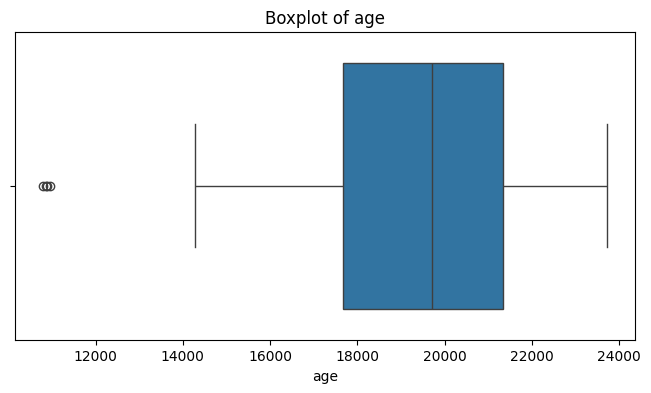

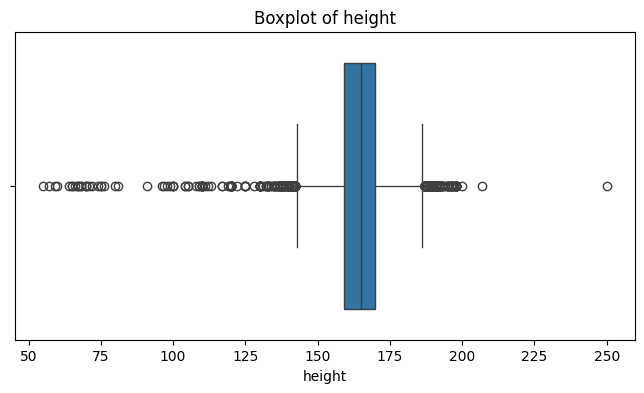

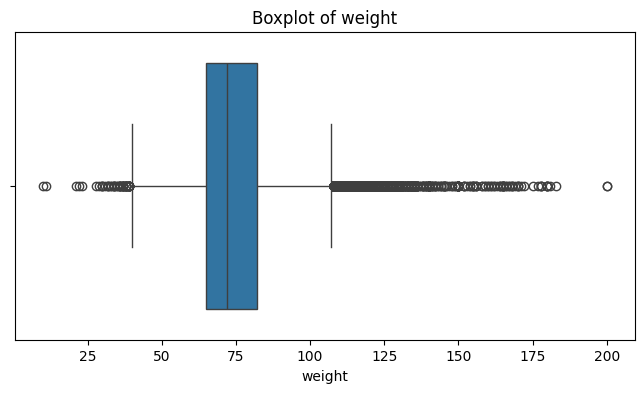

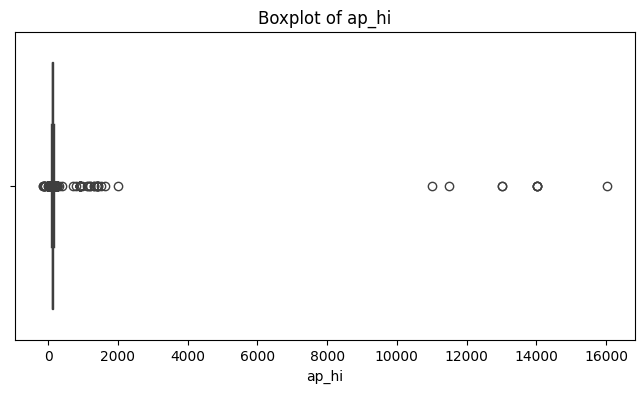

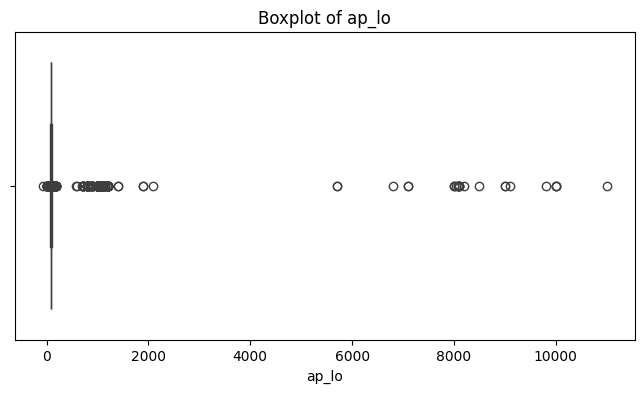

In [2]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Check for outliers in numerical columns
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


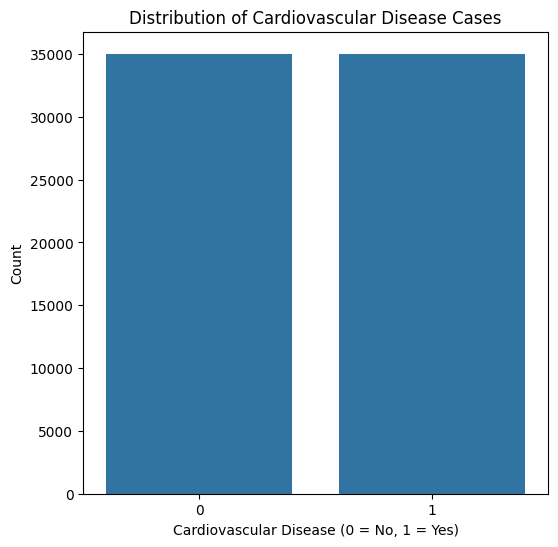

In [3]:
# Convert age from days to years
df['age'] = df['age'] / 365.25

# Calculate BMI
df['bmi'] = df['weight'] / (df['height']/100)**2

# Create blood pressure categories
def bp_category(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 'Normal'
    elif (120 <= row['ap_hi'] < 130) and row['ap_lo'] < 80:
        return 'Elevated'
    elif (130 <= row['ap_hi'] < 140) or (80 <= row['ap_lo'] < 90):
        return 'Hypertension Stage 1'
    elif (140 <= row['ap_hi'] < 180) or (90 <= row['ap_lo'] < 120):
        return 'Hypertension Stage 2'
    else:
        return 'Hypertensive Crisis'

df['bp_category'] = df.apply(bp_category, axis=1)

# Create cholesterol categories
df['cholesterol_level'] = df['cholesterol'].map({
    1: 'Normal',
    2: 'Above Normal',
    3: 'Well Above Normal'
})

# Create glucose categories
df['glucose_level'] = df['gluc'].map({
    1: 'Normal',
    2: 'Above Normal',
    3: 'Well Above Normal'
})

plt.figure(figsize=(6, 6))
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease Cases')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


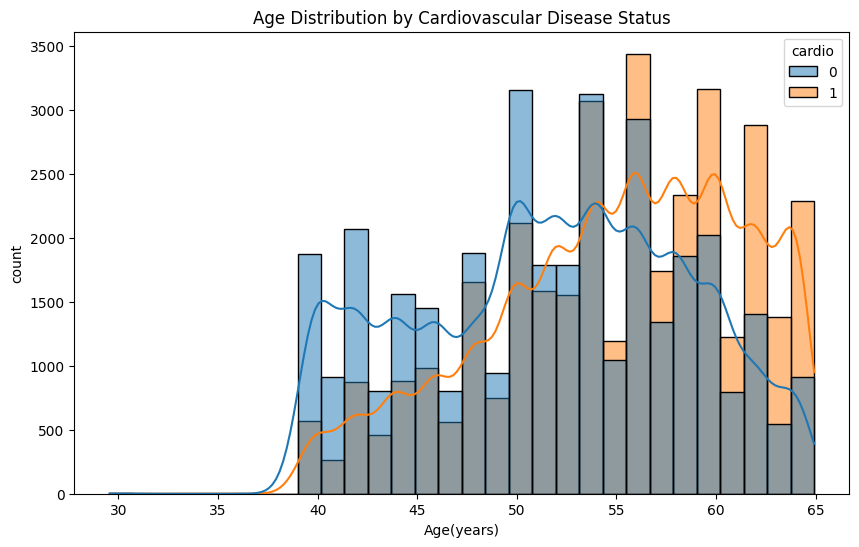

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='age',hue='cardio',bins=30,kde=True)
plt.title('Age Distribution by Cardiovascular Disease Status')
plt.xlabel('Age(years)')
plt.ylabel('count')
plt.show()

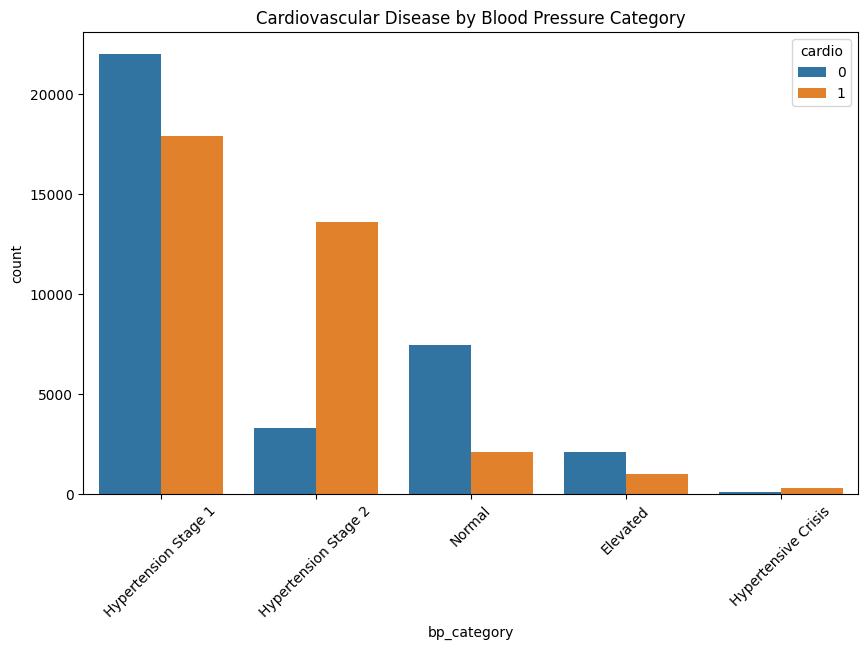

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='bp_category',hue='cardio')
plt.title('Cardiovascular Disease by Blood Pressure Category')
plt.xticks(rotation=45)
plt.show()

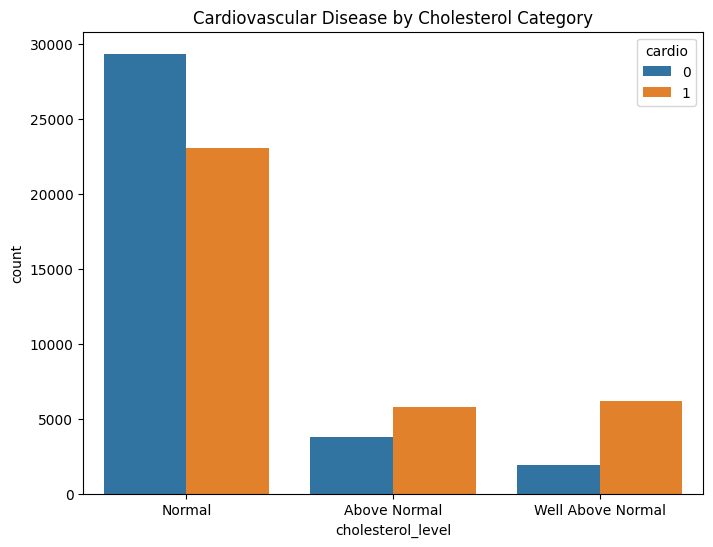

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='cholesterol_level',hue='cardio',order=['Normal','Above Normal', 'Well Above Normal'])
plt.title('Cardiovascular Disease by Cholesterol Category')
plt.show()

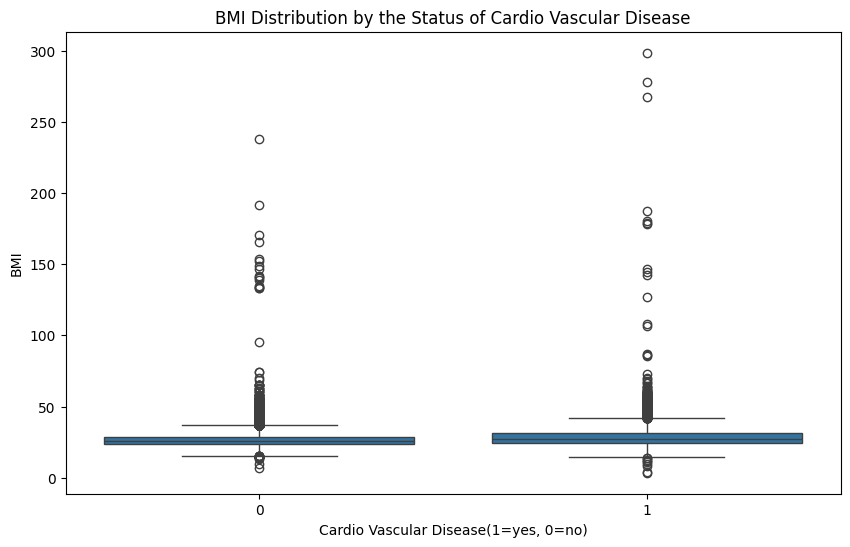

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='cardio', y='bmi')
plt.title('BMI Distribution by the Status of Cardio Vascular Disease')
plt.xlabel('Cardio Vascular Disease(1=yes, 0=no)')
plt.ylabel('BMI')
plt.show()

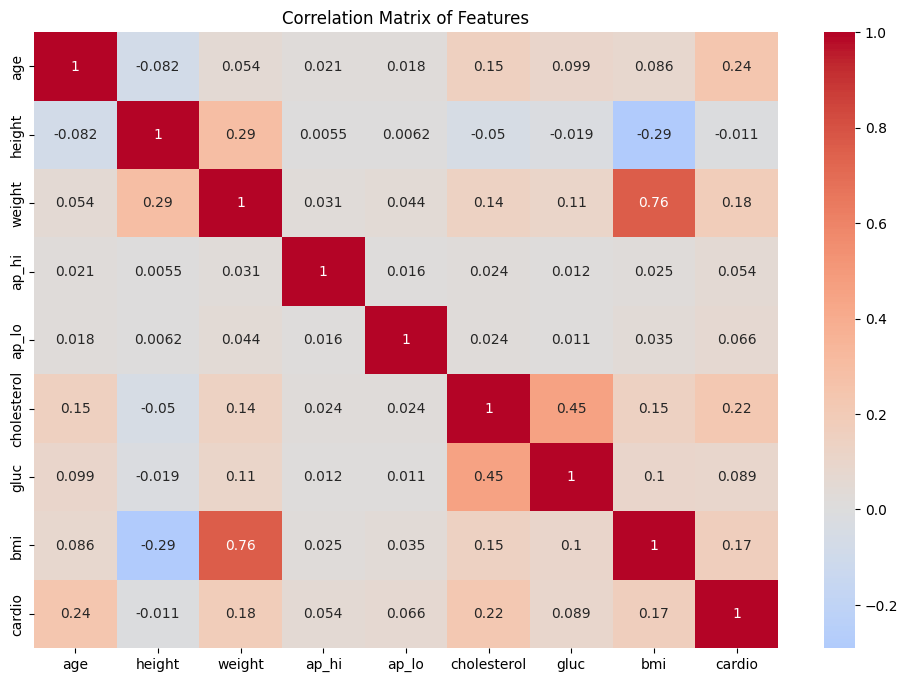

In [8]:
# Select numerical features for correlation
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'bmi', 'cardio']
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

In [10]:
# Prepare features and target
X = df.drop(['cardio', 'bp_category', 'cholesterol_level', 'glucose_level'], axis=1)
y = df['cardio']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Support Vector Machine Performance:
Accuracy: 0.7295238095238096
Confusion Matrix:
[[7947 2514]
 [3166 7373]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     10461
           1       0.75      0.70      0.72     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000


K-Nearest Neighbors Performance:
Accuracy: 0.6192857142857143
Confusion Matrix:
[[6614 3847]
 [4148 6391]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.63      0.62     10461
           1       0.62      0.61      0.62     10539

    accuracy                           0.62     21000
   macro avg       0.62      0.62      0.62     21000
weighted avg       0.62      0.62      0.62     21000


Decision Tree Performance:
Accuracy: 0.6310476190476191
Confusion Matrix:
[[6496

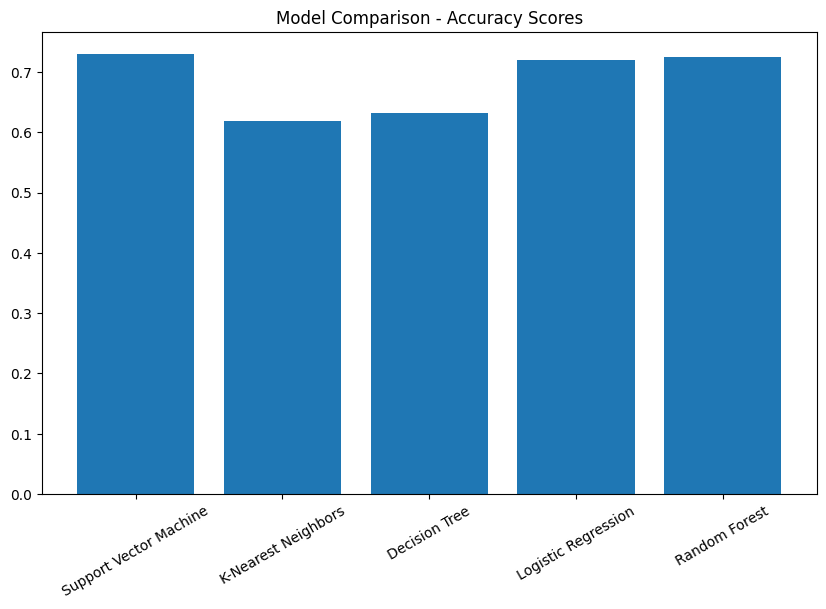

In [11]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Compare model accuracies
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Comparison - Accuracy Scores')
plt.xticks(rotation=30)
plt.show()


In [12]:
#get feature importance from Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importance =pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : rf.feature_importances_
}).sort_values('Importance',ascending=False)



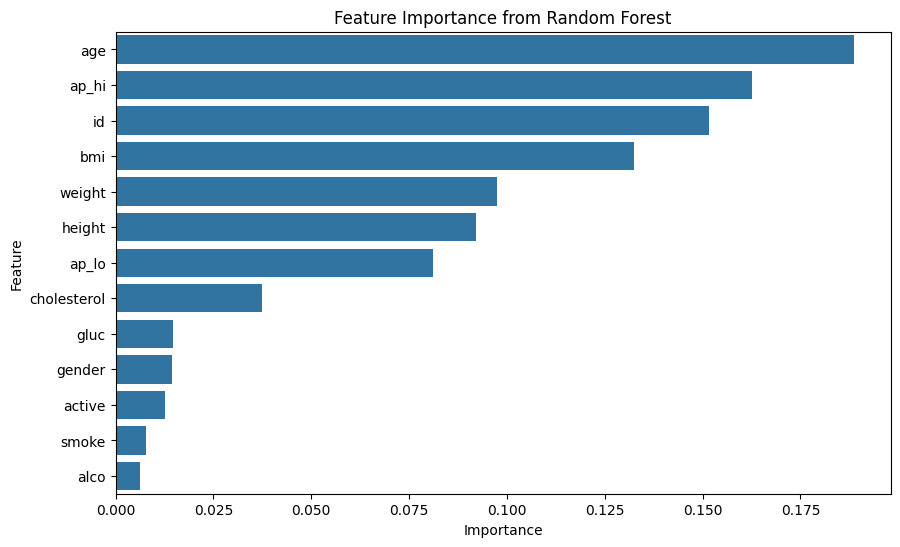

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance, x="Importance",y='Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Optimized hyperparameter grid (fewer combinations for faster execution)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV with 5-fold cross-validation and parallel processing
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [17]:
# Final model with best parameters
final_model = grid_search.best_estimator_

# Evaluate final model
y_pred_final = final_model.predict(X_test)
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))
print("Final Model Classification Report:")
print(classification_report(y_test, y_pred_final))

import joblib
joblib.dump(final_model,'heart_desease_model.pkl')

Final Model Accuracy: 0.7383333333333333
Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10461
           1       0.77      0.68      0.72     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000



['heart_desease_model.pkl']